# **Import Library yang dibutuhkan**

In [21]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [22]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_FreeFire_1.csv")
df.head()

,userName,score,at,content
0,Andi miftahul Qisthi,1,2024-05-21 00:56:14,Kemarin sebelum di update aplikasi nya bagus k...
1,hanhan ahmada hub,4,2024-05-21 00:53:07,Bagus
2,M. oktav syarifudin,4,2024-05-21 00:48:34,Garena gimana sih aku kode redeem nya warna it...
3,Alfaqi Samsung,5,2024-05-21 00:48:32,Bagus🎖
4,Indri_ Sarwasih,5,2024-05-21 00:48:31,kumaha damang?


In [23]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Kemarin sebelum di update aplikasi nya bagus k...,Andi miftahul Qisthi,2024-05-21 00:56:14
1,Bagus,hanhan ahmada hub,2024-05-21 00:53:07
2,Garena gimana sih aku kode redeem nya warna it...,M. oktav syarifudin,2024-05-21 00:48:34
3,Bagus🎖,Alfaqi Samsung,2024-05-21 00:48:32
4,kumaha damang?,Indri_ Sarwasih,2024-05-21 00:48:31
...,...,...,...
592,kata saya mah mending kasih bintang4 karna kas...,Erga Arwin,2024-05-20 11:41:10
593,Game nya bagus banget,Teku Riyan,2024-05-20 11:41:10
594,game ini sangat menarik bagi saya,Ahmad Dhani,2024-05-20 11:40:53
595,sangat Bagus dan. seru,Wildan Putra,2024-05-20 11:40:04


In [24]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   597 non-null    object
 1   userName  597 non-null    object
 2   at        597 non-null    object
dtypes: object(3)
memory usage: 14.1+ KB


In [25]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,597,597,597
unique,562,596,590
top,bagus,Muhammad Riski,2024-05-20 14:17:43
freq,12,2,2


# **Cleaning Data**

In [26]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(597, 3)

In [27]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [28]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [29]:
# Menghapus data yang kosong
df = df.dropna()

In [30]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [31]:
df.shape

(562, 3)

In [32]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [33]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [34]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,kemarin sebelum di update aplikasi nya bagus k...,Andi miftahul Qisthi,2024-05-21 00:56:14
1,bagus,hanhan ahmada hub,2024-05-21 00:53:07
2,garena gimana sih aku kode redeem nya warna it...,M. oktav syarifudin,2024-05-21 00:48:34
3,bagus,Alfaqi Samsung,2024-05-21 00:48:32
4,kumaha damang,Indri_ Sarwasih,2024-05-21 00:48:31
...,...,...,...
591,barusan main tim gak ngontak aj,Lutfi Maulana,2024-05-20 11:43:40
592,kata saya mah mending kasih bintang karna kasi...,Erga Arwin,2024-05-20 11:41:10
594,game ini sangat menarik bagi saya,Ahmad Dhani,2024-05-20 11:40:53
595,sangat bagus dan seru,Wildan Putra,2024-05-20 11:40:04


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [35]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,kemarin sebelum di update aplikasi nya bagus k...,Andi miftahul Qisthi,2024-05-21 00:56:14
1,bagus,hanhan ahmada hub,2024-05-21 00:53:07
2,garena gimana sih aku kode redeem nya warna it...,M. oktav syarifudin,2024-05-21 00:48:34
3,bagus,Alfaqi Samsung,2024-05-21 00:48:32
4,kumaha damang,Indri_ Sarwasih,2024-05-21 00:48:31
...,...,...,...
591,barusan main tim tidak ngontak aj,Lutfi Maulana,2024-05-20 11:43:40
592,kata saya mah mending kasih bintang karna kasi...,Erga Arwin,2024-05-20 11:41:10
594,game ini sangat menarik bagi saya,Ahmad Dhani,2024-05-20 11:40:53
595,sangat bagus dan seru,Wildan Putra,2024-05-20 11:40:04


In [36]:
# Menginstall Library Sastrawi
!pip install Sastrawi

In [37]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,kemarin di update aplikasi nya bagus skrng col...,Andi miftahul Qisthi,2024-05-21 00:56:14
1,bagus,hanhan ahmada hub,2024-05-21 00:53:07
2,garena gimana sih aku kode redeem nya warna it...,M. oktav syarifudin,2024-05-21 00:48:34
3,bagus,Alfaqi Samsung,2024-05-21 00:48:32
4,kumaha damang,Indri_ Sarwasih,2024-05-21 00:48:31
...,...,...,...
591,barusan main tim ngontak aj,Lutfi Maulana,2024-05-20 11:43:40
592,kata mah mending kasih bintang karna kasian di...,Erga Arwin,2024-05-20 11:41:10
594,game sangat menarik saya,Ahmad Dhani,2024-05-20 11:40:53
595,sangat bagus seru,Wildan Putra,2024-05-20 11:40:04


In [38]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [kemarin, di, update, aplikasi, nya, bagus, sk...
1                                                [bagus]
2      [garena, gimana, sih, aku, kode, redeem, nya, ...
3                                                [bagus]
4                                       [kumaha, damang]
                             ...                        
591                    [barusan, main, tim, ngontak, aj]
592    [kata, mah, mending, kasih, bintang, karna, ka...
594                        [game, sangat, menarik, saya]
595                                [sangat, bagus, seru]
596                                  [aku, player, epep]
Name: content, Length: 562, dtype: object

In [39]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_FreeFire_1.csv', index = False)


In [40]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_FreeFire_1.csv', encoding = 'latin1')
df_clean

,content
0,kemarin di update aplikasi nya bagus skrng col...
1,bagus
2,garena gimana sih aku kode redeem nya warna it...
3,bagus
4,maha damang
...,...
557,barusan main tim ngontak aj
558,kata mah mending kasih bintang karna kasi sana...
559,game sangat tarik saya
560,sangat bagus seru


# **Translate**

In [41]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [42]:
# import pandas as pd
# from easynmt import EasyNMT

In [43]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_FreeFire_1.csv', encoding='latin1')

In [44]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [45]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [46]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [47]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_FreeFire_1.csv')

In [48]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_FreeFire_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,kemarin di update aplikasi nya bagus skrng col...,"Yesterday on the app update, it was good. Now ..."
1,1,bagus,Good.
2,2,garena gimana sih aku kode redeem nya warna it...,"fontcolor="" # FFFF00"" garena fontcolor fontcol..."
3,3,bagus,Good.
4,4,maha damang,Ommature
...,...,...,...
557,557,barusan main tim ngontak aj,I was just playing the team.
558,558,kata mah mending kasih bintang karna kasi sana...,"The word ""gave you a star"" 'cause it takes a s..."
559,559,game sangat tarik saya,The game is so pull me
560,560,sangat bagus seru,It's great. It's great. It's great.


# **Labeling**

In [49]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_FreeFire_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,kemarin di update aplikasi nya bagus skrng col...,"Yesterday on the app update, it was good. Now ..."
1,1,bagus,Good.
2,2,garena gimana sih aku kode redeem nya warna it...,"fontcolor="" # FFFF00"" garena fontcolor fontcol..."
3,3,bagus,Good.
4,4,maha damang,Ommature
...,...,...,...
557,557,barusan main tim ngontak aj,I was just playing the team.
558,558,kata mah mending kasih bintang karna kasi sana...,"The word ""gave you a star"" 'cause it takes a s..."
559,559,game sangat tarik saya,The game is so pull me
560,560,sangat bagus seru,It's great. It's great. It's great.


In [50]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [51]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [52]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 289
Netral = 187
Negatif = 86

Total Data Seluruhnya : 562


In [53]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,kemarin di update aplikasi nya bagus skrng col...,"Yesterday on the app update, it was good. Now ...",Positif
1,1,bagus,Good.,Positif
2,2,garena gimana sih aku kode redeem nya warna it...,"fontcolor="" # FFFF00"" garena fontcolor fontcol...",Netral
3,3,bagus,Good.,Positif
4,4,maha damang,Ommature,Netral
...,...,...,...,...
557,557,barusan main tim ngontak aj,I was just playing the team.,Netral
558,558,kata mah mending kasih bintang karna kasi sana...,"The word ""gave you a star"" 'cause it takes a s...",Positif
559,559,game sangat tarik saya,The game is so pull me,Negatif
560,560,sangat bagus seru,It's great. It's great. It's great.,Positif


In [54]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,kemarin di update aplikasi nya bagus skrng col...,"Yesterday on the app update, it was good. Now ...",Positif
1,bagus,Good.,Positif
2,garena gimana sih aku kode redeem nya warna it...,"fontcolor="" # FFFF00"" garena fontcolor fontcol...",Netral
3,bagus,Good.,Positif
4,maha damang,Ommature,Netral
...,...,...,...
557,barusan main tim ngontak aj,I was just playing the team.,Netral
558,kata mah mending kasih bintang karna kasi sana...,"The word ""gave you a star"" 'cause it takes a s...",Positif
559,game sangat tarik saya,The game is so pull me,Negatif
560,sangat bagus seru,It's great. It's great. It's great.,Positif


# **Visualisasi**


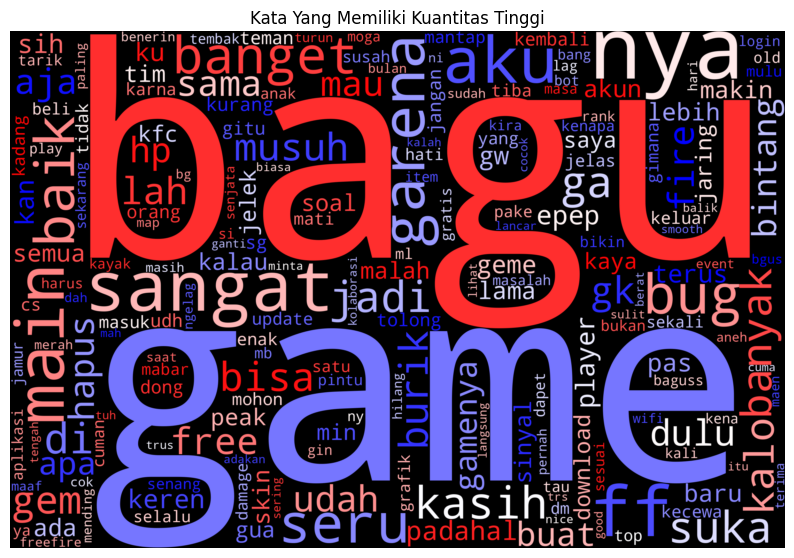

In [55]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


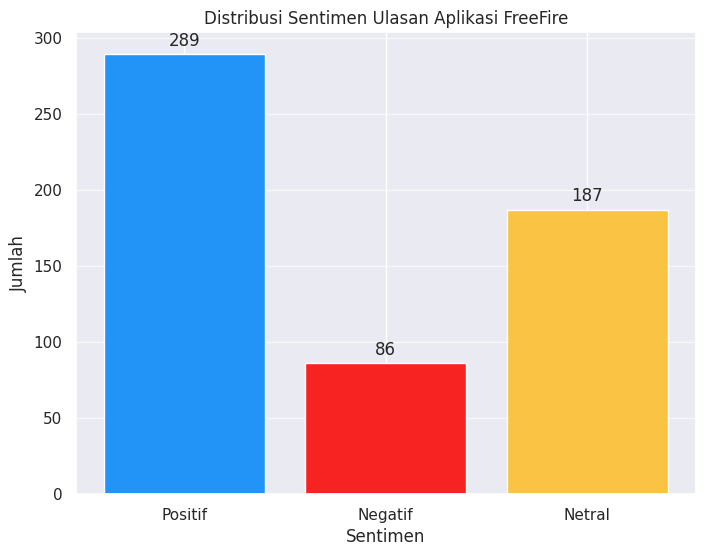

In [56]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi FreeFire")


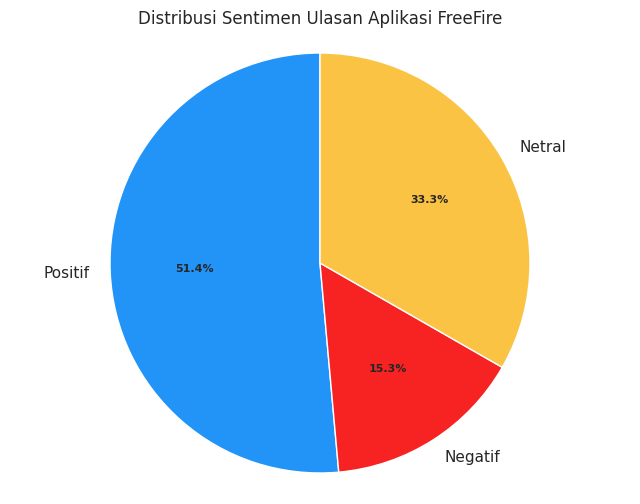

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi FreeFire")

In [58]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,kemarin di update aplikasi nya bagus skrng col...,"Yesterday on the app update, it was good. Now ...",Positif
1,bagus,Good.,Positif
3,bagus,Good.,Positif
7,i love you,I love you,Positif
8,wow nice,Wow. Nice.,Positif
...,...,...,...
554,ga tau siapa kasih bintang ini game buriq,I don't know who gave this star a Buriq game.,Negatif
556,sangat bagus,Very good.,Positif
558,kata mah mending kasih bintang karna kasi sana...,"The word ""gave you a star"" 'cause it takes a s...",Positif
559,game sangat tarik saya,The game is so pull me,Negatif


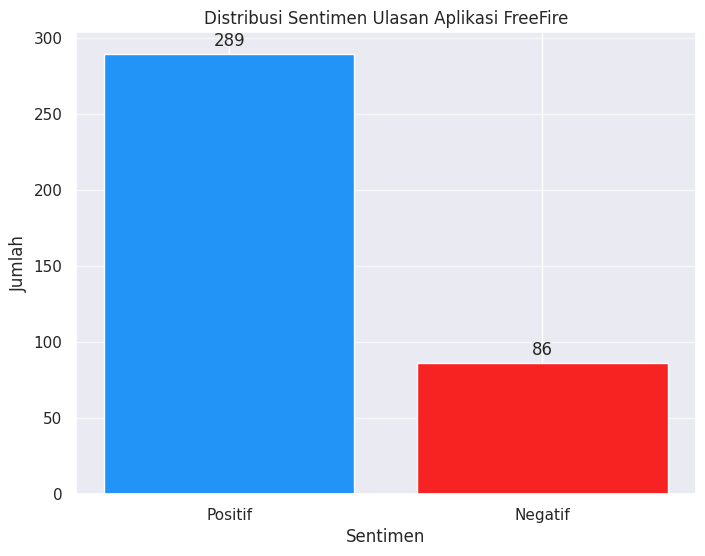

In [59]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi FreeFire")


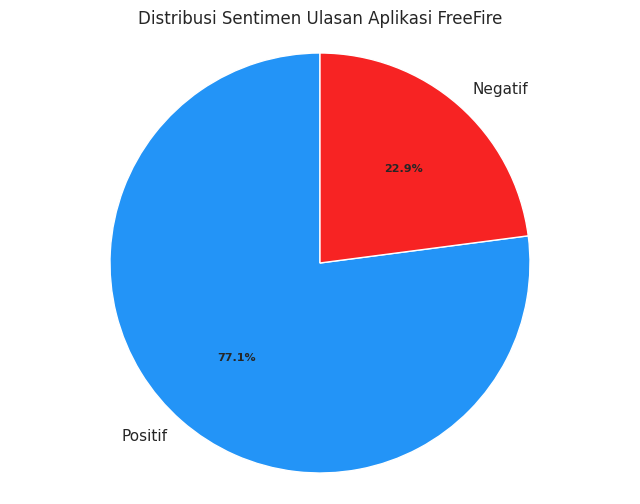

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi FreeFire")

In [61]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,kemarin di update aplikasi nya bagus skrng col...,"Yesterday on the app update, it was good. Now ...",1
1,bagus,Good.,1
3,bagus,Good.,1
7,i love you,I love you,1
8,wow nice,Wow. Nice.,1
...,...,...,...
554,ga tau siapa kasih bintang ini game buriq,I don't know who gave this star a Buriq game.,0
556,sangat bagus,Very good.,1
558,kata mah mending kasih bintang karna kasi sana...,"The word ""gave you a star"" 'cause it takes a s...",1
559,game sangat tarik saya,The game is so pull me,0


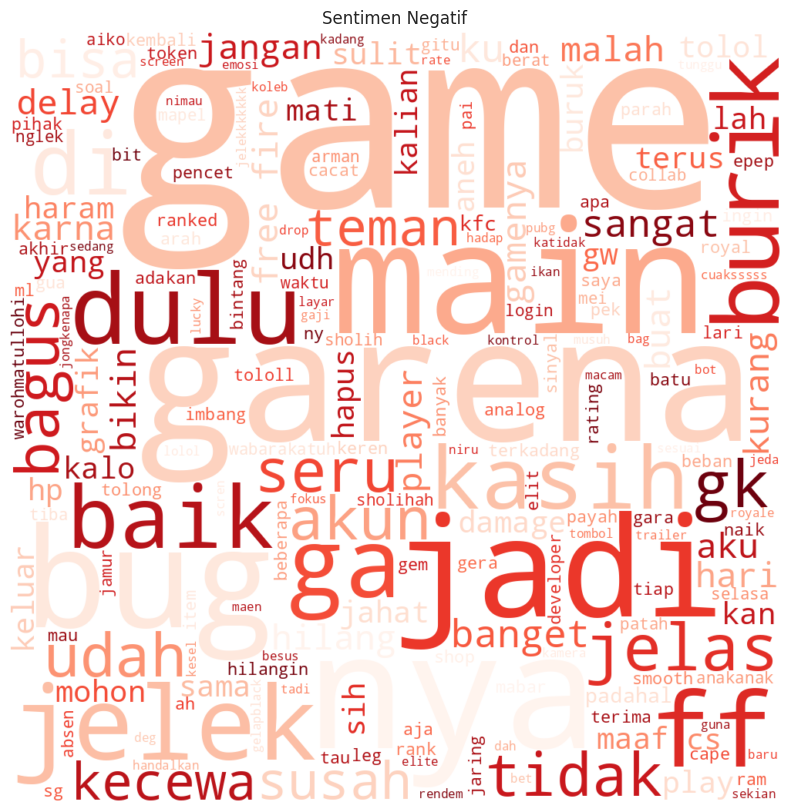

In [62]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

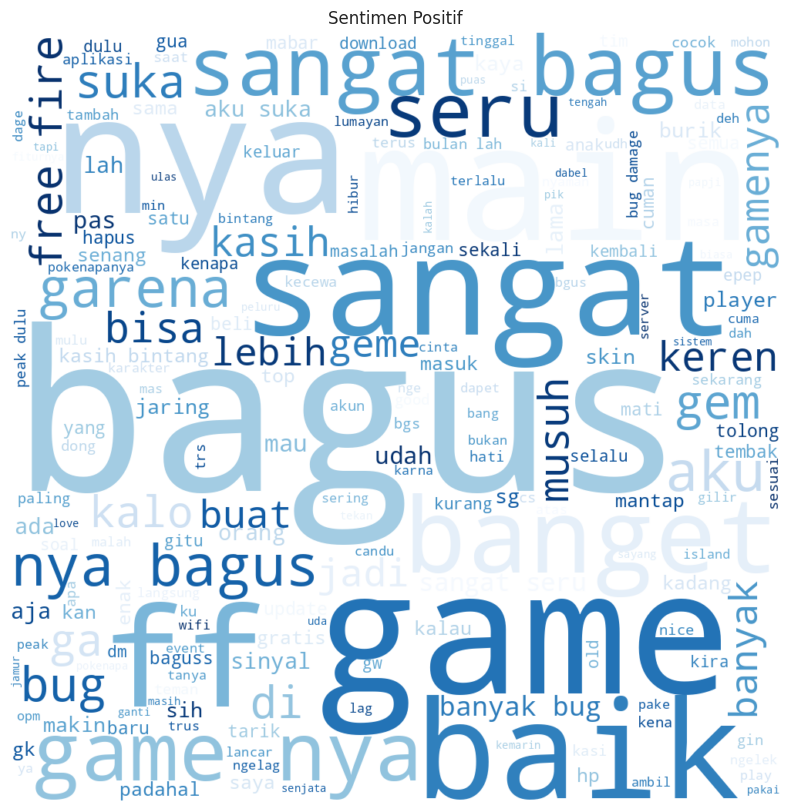

In [63]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [64]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    289
0     86
Name: count, dtype: int64

# **Data Preparation & Modeling**

In [82]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [83]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [84]:
X_train

304    masalah dage yaadari awal masuk dage bagus lo ...
114                            bagus banget jangan hapus
127    kontrol analog niru pubg jadi ga fokus main ni...
545                                                  dim
28                                      gem sangat bagus
                             ...                        
106                                        game baik aku
168                                             jelek ah
415                                   sangat seru banget
520                                           seru bagus
158                           bagus epep free fire burik
Name: content, Length: 300, dtype: object

In [85]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [86]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [87]:
X_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.8
Akurasi untuk c = 0.05: 0.8
Akurasi untuk c = 0.25: 0.8133333333333334
Akurasi untuk c = 0.5: 0.8533333333333334
Akurasi untuk c = 0.75: 0.8533333333333334
Akurasi untuk c = 1: 0.84


In [89]:
svm = LinearSVC(C = 1.0)
svm.fit(X_train_vec, y_train)

LinearSVC()

In [90]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.84 


In [91]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.84
[[ 7  8]
 [ 4 56]]
              precision    recall  f1-score   support

           0       0.64      0.47      0.54        15
           1       0.88      0.93      0.90        60

    accuracy                           0.84        75
   macro avg       0.76      0.70      0.72        75
weighted avg       0.83      0.84      0.83        75



In [101]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 7  8]
 [ 4 56]]

True Positives (TP) =  7

True Negatives (TN) =  56

False Positives (FP) =  8

False Negatives (FN) =  4

Accuracy =  0.84


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

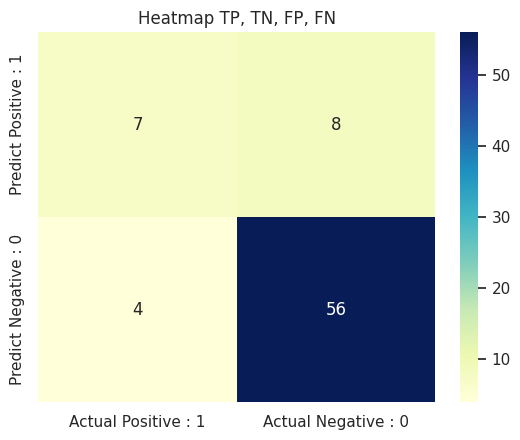

In [104]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [98]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [99]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8400


In [100]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1600


# **Testing**


In [105]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svm.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : gamenya sangat bagus
Hasil Analisis Sentimen Untuk Teks Baru : Positif


In [106]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svm.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : game jelek grafik ampas
Hasil Analisis Sentimen Untuk Teks Baru : Negatif
